In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from hospital.ml_logic.data import get_data_cleaned
from hospital.ml_logic.preprocessing import sk_learn_proc
from hospital.ml_logic.model import model_initalize, train_model, evaluate_model
from hospital.ml_logic.registry import load_model

from sklearn.model_selection import train_test_split

In [3]:
X, y = get_data_cleaned()

In [4]:


X_proc = sk_learn_proc(X)

X_proc

,ACS,AF,AGE,AKI,ALCOHOL,ANAEMIA,ATYPICAL CHEST PAIN,CAD,CARDIOGENIC SHOCK,CHB,...,SMOKING,SSS,STABLE ANGINA,STEMI,TLC,TYPE OF ADMISSION-EMERGENCY/OPD,UREA,UTI,VALVULAR,VT
0,1.0,0.0,1.117647,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.24,0.0,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.176471,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-0.18,0.0,-0.592593,0.0,0.0,1.0
2,0.0,0.0,-0.529412,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.96,0.0,2.185185,0.0,0.0,0.0
3,0.0,0.0,0.294118,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.0,-0.259259,0.0,0.0,0.0
4,0.0,0.0,-0.117647,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-0.16,0.0,0.777778,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13750,0.0,0.0,-0.117647,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.02,0.0,-0.592593,0.0,0.0,0.0
13751,1.0,0.0,1.411765,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.76,1.0,0.851852,0.0,0.0,0.0
13752,0.0,0.0,1.176471,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.36,0.0,1.222222,0.0,0.0,0.0
13753,0.0,0.0,-0.176471,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.52,1.0,-0.185185,0.0,0.0,0.0


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
model = model_initalize()

model

KNeighborsRegressor(metric='manhattan', n_neighbors=11, weights='distance')

In [7]:
from hospital.ml_logic.model import train_model, evaluate_model, save_model

model = train_model(model, X_train, y_train)

evaluate_model(model, X_test, y_test)

ValueError: could not convert string to float: 'M'

In [8]:
save_model(model, 'knn_model.pkl')

Model has been saved as knn_model.pkl


In [9]:
import pickle

# Load the saved model from the pickle file
with open('knn_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Now you can use `loaded_model` to make predictions just like the original model


In [10]:
# import pickle
# from sklearn.metrics import mean_absolute_error
# from sklearn.model_selection import train_test_split

# # Step 1: Load the model
# with open('knn_model.pkl', 'rb') as file:
#     loaded_model = pickle.load(file)

# # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Step 2: Use the loaded model for predictions
# y_pred = loaded_model.predict(X_test)

# # Step 3: Evaluate the loaded model
# mae = mean_absolute_error(y, y_pred)
# print(f'Mean Absolute Error (MAE) for the loaded model: {mae}')

In [11]:
import pickle
from sklearn.metrics import mean_absolute_error

# Preprocess the data again (make sure to use the same split and preprocessing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Load the model
with open('knn_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Evaluate the loaded model on the same test set
y_pred = loaded_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE after loading the model: {mae}")


ValueError: could not convert string to float: 'F'

In [12]:
model = load_model()

model

FileNotFoundError: [Errno 2] No such file or directory: '../../knn_model.pkl'

راحت الملايين 


:(((

                            Feature  Importance
43                             UREA    0.034488
41                              TLC    0.033830
2                               AGE    0.018944
42  TYPE OF ADMISSION-EMERGENCY/OPD    0.014477
39                    STABLE ANGINA    0.010303
0                               ACS    0.010128
13                       CREATININE    0.010038
6               ATYPICAL CHEST PAIN    0.006834
5                           ANAEMIA    0.005680
40                            STEMI    0.005601
20                          GLUCOSE    0.004425
21                               HB    0.004310
44                              UTI    0.003302
36                            SHOCK    0.003237
4                           ALCOHOL    0.002318
9                               CHB    0.002003
15                      CVA INFRACT    0.001301
24                            HFREF    0.000974
8                 CARDIOGENIC SHOCK    0.000612
37                         SMOKING     0

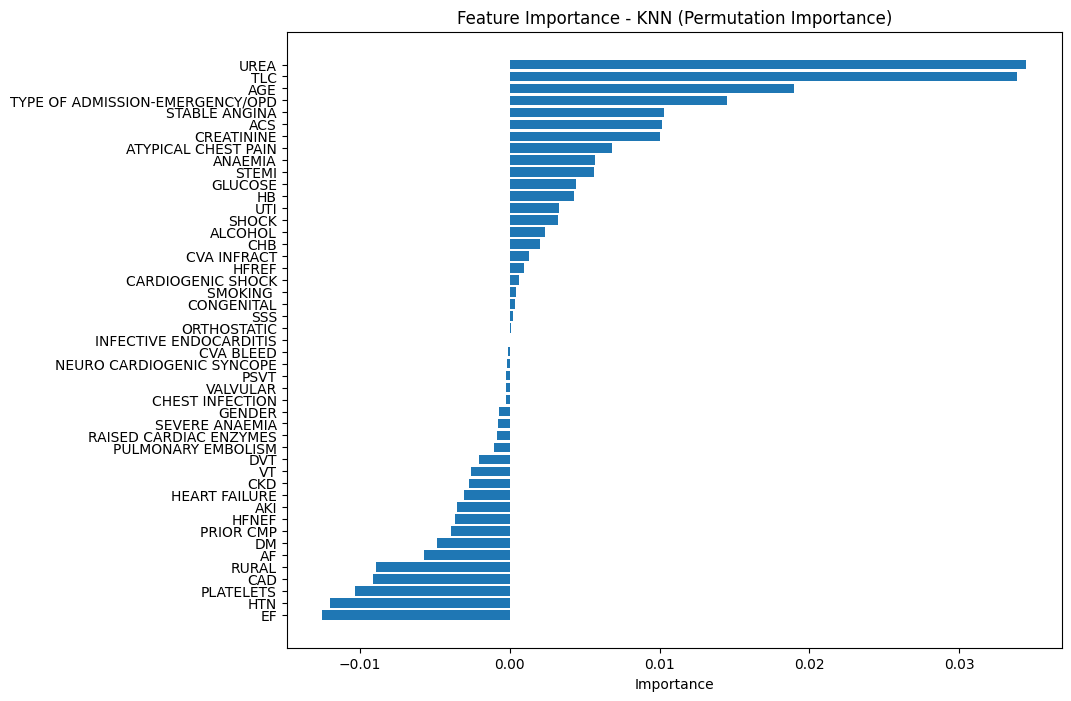

In [25]:
import pandas as pd
from sklearn.inspection import permutation_importance
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

# Assuming you have trained a KNN model `model`
# and have your data as X and y

# Example split of your data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train your KNN model (example)
model = KNeighborsRegressor(n_neighbors=5)
model.fit(X_train, y_train)

# Calculate permutation importance using X_test and y_test
result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)

# Create a DataFrame to store feature importance
feature_importance_df = pd.DataFrame({
    'Feature': X_test.columns,
    'Importance': result.importances_mean
})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the sorted feature importance
print(feature_importance_df)

# Plot the feature importance
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance - KNN (Permutation Importance)')
plt.gca().invert_yaxis()  # Invert y-axis to show highest importance at the top
plt.show()


In [14]:
list(model.feature_names_in_)

['AGE',
 'GENDER',
 'RURAL',
 'TYPE OF ADMISSION-EMERGENCY/OPD',
 'SMOKING ',
 'ALCOHOL',
 'DM',
 'HTN',
 'CAD',
 'PRIOR CMP',
 'CKD',
 'HB',
 'TLC',
 'PLATELETS',
 'GLUCOSE',
 'UREA',
 'CREATININE',
 'RAISED CARDIAC ENZYMES',
 'EF',
 'SEVERE ANAEMIA',
 'ANAEMIA',
 'STABLE ANGINA',
 'ACS',
 'STEMI',
 'ATYPICAL CHEST PAIN',
 'HEART FAILURE',
 'HFREF',
 'HFNEF',
 'VALVULAR',
 'CHB',
 'SSS',
 'AKI',
 'CVA INFRACT',
 'CVA BLEED',
 'AF',
 'VT',
 'PSVT',
 'CONGENITAL',
 'UTI',
 'NEURO CARDIOGENIC SYNCOPE',
 'ORTHOSTATIC',
 'INFECTIVE ENDOCARDITIS',
 'DVT',
 'CARDIOGENIC SHOCK',
 'SHOCK',
 'PULMONARY EMBOLISM',
 'CHEST INFECTION']

In [15]:
def load_model_():
    with open('knn_model.pkl', 'rb') as file:
        loaded_model = pickle.load(file)

    return loaded_model

abd=load_model_()

In [17]:
import pandas as pd

In [18]:
abb_ = pd.read_csv("abd.csv")

In [24]:
abb_.drop(columns="Unnamed: 0",inplace=True)

In [25]:
abd.predict(abb_)

AttributeError: 'KNeighborsRegressor' object has no attribute 'n_samples_fit_'